# Deep Learning Playlist
### Discussion

Deep learning terms and topics

- Understand what they mean
- How they fit in to the overall deep learning framework
- How certain topics are implemented in code
  - Using Keras

## Machine Learning (ML)

Machine Learning is the practice of using algorithms to analyze data, learn from that data, and then make a determination or prediction about new data. 

### Machine Learning vs. Traditional Programming

Example: Analyzing the sentament of a popular media outlet and classifying that sentiment as positive or negative

- Traditional Programming approach
 - The algorithm may first look for particular words associated with a negative or positive sentiment.
 - With conditional statements, the algorithm would classify articles as positive or negative based on the words that it knows are positive or negative.
 
- Machine Learning approach
 - The algorithm would analyze large amounts of given media data and *learn* the features that classify what a negative article looks like versus a positive article.
 - With what it's learned, the algorithm could then classify new articles as positive or negative.

## Deep Learning (DL)

This video will cover the most basic idea about what deep learning is and how it’s used. In later videos, we’ll be cover more detailed concepts, terms, and tools within the field of deep learning.

**Definition:**

- Deep learning is a subfield of machine learning that uses algorithms inspired by the structure and function of the brain’s neural networks. 
- As a subfield of ML, DL also algorithms to analyze data, learn from that data, and then make a determination or prediction about new data.

**Supervised Learning** occurs when your deep learning model learns and makes inferences from data that has already been *labeled*.

**Unsupervised Learning** occurs when the model learns and makes inferences from *unlabeled* data. 

**Labeled vs. Unlabeled example**

- Classify images of cats and dogs

### Artificial Neural Networks

Artificial neural networks are deep learning models that are based on the structure of the brain's neural networks. 

- Artificial neural networks are used interchangeably with the terms
  - neural net
  - net
  - model

## Artificial Neural Networks (ANNs)

Artificial neural networks are computing systems that are inspired by the brain’s neural networks.

- These networks are based on a collection of connected units called **artificial neurons**, or **neurons**. 
- Each connection between neurons can transmit a signal from one neuron to another. 
- The receiving neuron processes the signal and signals downstream neurons connected to it.
- Neurons are organized in layers.
 - Input layer
 - Hidden layers
 - Output layer

### Keras Sequential Model

The Sequential model is a linear stack of layers.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(10,), activation='relu'),
    Dense(2, activation='softmax'),
])

## Layers in an ANN

Artificial neural network are typically organized in layers. 
Different types of layers include

- Dense (or fully connected) Layers
- Convolutional layers
- Pooling Layers
- Recurrent Layers
- Normalization Layers
- Many others

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(5, input_shape=(3,), activation='relu'),
    Dense(2, activation='softmax'),
])

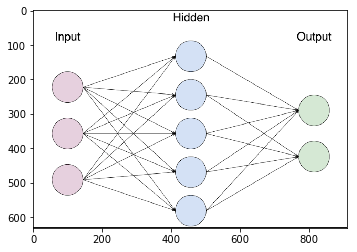

In [17]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

img = np.expand_dims(ndimage.imread('NN.PNG'),0)
plt.imshow(img[0])

## Activation Functions

In an artificial neural network, the activation function of a neuron defines the output of that neuron given a set of inputs.

- Biologically inspired by activity in our brains, where different neurons fire, or are *activated*, by different stimuli. 

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(5, input_shape=(3,), activation='relu')
])

In [44]:
model = Sequential()
model.add(Dense(5, input_shape=(3,)))
model.add(Activation('relu'))

### Pre-process data for training

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [50]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [51]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [52]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/home/epoch/anaconda2/envs/fastai34/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


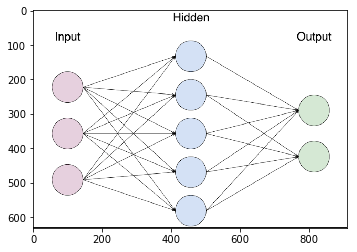

In [45]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

img = np.expand_dims(ndimage.imread('NN.PNG'),0)
plt.imshow(img[0])

## Training

Solving an optimization problem
 - Optimizing weights 
  - with Stochastic Gradient Descent (SGD)
 - Objective: Minimize the loss function

## Learning

In [79]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [80]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [81]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.loss = 'sparse_categorical_crossentropy'

In [75]:
model.loss

'sparse_categorical_crossentropy'

In [58]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
0s - loss: 0.6400 - acc: 0.5576
Epoch 2/20
0s - loss: 0.6061 - acc: 0.6310
Epoch 3/20
0s - loss: 0.5748 - acc: 0.7010
Epoch 4/20
0s - loss: 0.5401 - acc: 0.7633
Epoch 5/20
0s - loss: 0.5050 - acc: 0.7990
Epoch 6/20
0s - loss: 0.4702 - acc: 0.8300
Epoch 7/20
0s - loss: 0.4366 - acc: 0.8495
Epoch 8/20
0s - loss: 0.4066 - acc: 0.8767
Epoch 9/20
0s - loss: 0.3808 - acc: 0.8814
Epoch 10/20
0s - loss: 0.3596 - acc: 0.8962
Epoch 11/20
0s - loss: 0.3420 - acc: 0.9043
Epoch 12/20
0s - loss: 0.3282 - acc: 0.9090
Epoch 13/20
0s - loss: 0.3170 - acc: 0.9129
Epoch 14/20
0s - loss: 0.3081 - acc: 0.9210
Epoch 15/20
0s - loss: 0.3014 - acc: 0.9190
Epoch 16/20
0s - loss: 0.2959 - acc: 0.9205
Epoch 17/20
0s - loss: 0.2916 - acc: 0.9238
Epoch 18/20
0s - loss: 0.2879 - acc: 0.9267
Epoch 19/20
0s - loss: 0.2848 - acc: 0.9252
Epoch 20/20
0s - loss: 0.2824 - acc: 0.9286


## Data Sets

In [82]:
scaled_train_samples

array([[ 0.27586207],
       [ 0.87356322],
       [ 0.26436782],
       ..., 
       [ 0.96551724],
       [ 0.2183908 ],
       [ 0.75862069]])

In [83]:
train_labels

array([1, 0, 1, ..., 1, 0, 1])

In [84]:
model.fit(scaled_train_samples, train_labels, validation_split = 0.20, batch_size=10, 
          epochs=20, shuffle=True, verbose=2)

Train on 1680 samples, validate on 420 samples
Epoch 1/20
0s - loss: 0.6994 - acc: 0.4970 - val_loss: 0.6960 - val_acc: 0.5000
Epoch 2/20
0s - loss: 0.6906 - acc: 0.5774 - val_loss: 0.6815 - val_acc: 0.6952
Epoch 3/20
0s - loss: 0.6754 - acc: 0.7179 - val_loss: 0.6613 - val_acc: 0.7857
Epoch 4/20
0s - loss: 0.6548 - acc: 0.7720 - val_loss: 0.6341 - val_acc: 0.8333
Epoch 5/20
0s - loss: 0.6296 - acc: 0.7958 - val_loss: 0.6001 - val_acc: 0.8571
Epoch 6/20
0s - loss: 0.5951 - acc: 0.8161 - val_loss: 0.5516 - val_acc: 0.8714
Epoch 7/20
0s - loss: 0.5545 - acc: 0.8250 - val_loss: 0.5004 - val_acc: 0.8881
Epoch 8/20
0s - loss: 0.5091 - acc: 0.8446 - val_loss: 0.4400 - val_acc: 0.9119
Epoch 9/20
0s - loss: 0.4637 - acc: 0.8726 - val_loss: 0.3886 - val_acc: 0.9310
Epoch 10/20
0s - loss: 0.4283 - acc: 0.8798 - val_loss: 0.3454 - val_acc: 0.9381
Epoch 11/20
0s - loss: 0.3997 - acc: 0.8863 - val_loss: 0.3096 - val_acc: 0.9524
Epoch 12/20
0s - loss: 0.3776 - acc: 0.8917 - val_loss: 0.2805 - val_ac

In [ ]:
valid_set = [(sample, label), (sample, label), ... , (sample, label)]

In [ ]:
model.fit(scaled_train_samples, train_labels, validation_data = valid_set, batch_size=10, 
          epochs=20, shuffle=True, verbose=2)

## Regularization

In [108]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras import regularizers

In [109]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(2, activation='sigmoid')
])

## Learning Rate

In [116]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [120]:
model.optimizer.lr = 0.01

In [122]:
model.optimizer.lr

0.01

## Batch Size

In [ ]:
model.fit(scaled_train_samples, train_labels, validation_data = valid_set, batch_size=10, 
          epochs=20, shuffle=True, verbose=2)

## Predicting

In [18]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [63]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [64]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
0s - loss: 0.6933 - acc: 0.6419
Epoch 2/20
0s - loss: 0.6710 - acc: 0.7857
Epoch 3/20
0s - loss: 0.6397 - acc: 0.8443
Epoch 4/20
0s - loss: 0.6061 - acc: 0.8476
Epoch 5/20
0s - loss: 0.5678 - acc: 0.8505
Epoch 6/20
0s - loss: 0.5228 - acc: 0.8600
Epoch 7/20
0s - loss: 0.4681 - acc: 0.8733
Epoch 8/20
0s - loss: 0.4105 - acc: 0.8962
Epoch 9/20
0s - loss: 0.3670 - acc: 0.9119
Epoch 10/20
0s - loss: 0.3329 - acc: 0.9167
Epoch 11/20
0s - loss: 0.3100 - acc: 0.9243
Epoch 12/20
0s - loss: 0.2925 - acc: 0.9271
Epoch 13/20
0s - loss: 0.2820 - acc: 0.9300
Epoch 14/20
0s - loss: 0.2757 - acc: 0.9338
Epoch 15/20
0s - loss: 0.2712 - acc: 0.9319
Epoch 16/20
0s - loss: 0.2681 - acc: 0.9381
Epoch 17/20
0s - loss: 0.2655 - acc: 0.9376
Epoch 18/20
0s - loss: 0.2634 - acc: 0.9352
Epoch 19/20
0s - loss: 0.2618 - acc: 0.9390
Epoch 20/20
0s - loss: 0.2603 - acc: 0.9352


In [22]:
# Preprocess test data

test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/home/epoch/anaconda2/envs/fastai34/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [23]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

In [24]:
for i in predictions:
    print(i)

[ 0.28293326  0.35764667]
[ 0.26525486  0.37844887]
[ 0.85707456  0.04403995]
[ 0.0979089   0.67903334]
[ 0.87152088  0.04061354]
[ 0.04943148  0.85192239]
[ 0.880009   0.0379883]
[ 0.12007324  0.61951774]
[ 0.64052224  0.10959   ]
[ 0.13958886  0.5766331 ]
[ 0.82027066  0.0517699 ]
[ 0.04943148  0.85192239]
[ 0.87042195  0.04095384]
[ 0.23208363  0.42135212]
[ 0.77739257  0.06212683]
[ 0.23208363  0.42135212]
[ 0.8121165   0.05363343]
[ 0.06808709  0.7811752 ]
[ 0.85707456  0.04403995]
[ 0.0430468   0.87568933]
[ 0.880009   0.0379883]
[ 0.18797709  0.48778817]
[ 0.83300829  0.04906356]
[ 0.07451599  0.7569769 ]
[ 0.32034045  0.31766897]
[ 0.24829839  0.39970824]
[ 0.85979176  0.04345375]
[ 0.09193034  0.69722801]
[ 0.87477005  0.0396088 ]
[ 0.10429112  0.66016704]
[ 0.42364404  0.22938529]
[ 0.21662255  0.44330263]
[ 0.84821194  0.04590416]
[ 0.0430468   0.87568933]
[ 0.82027066  0.0517699 ]
[ 0.06808709  0.7811752 ]
[ 0.87042195  0.04095384]
[ 0.04120404  0.88207549]
[ 0.86930537  0.

## Supervised Learning

In [25]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam

In [34]:
model = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [35]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
# weight, height
train_samples = [[150, 67], [130, 60], [200, 65], [125, 52], [230, 72], [181, 70]]

In [37]:
# 0: male
# 1: female
train_labels = [1, 1, 0, 1, 0, 0]

In [ ]:
model.fit(x=train_samples, y=train_labels, batch_size=3, epochs=10, shuffle=True, verbose=2)

## Batch Normalization

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

In [10]:
model = Sequential([
    Dense(16, input_shape=(1,5), activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(axis=1),
    Dense(2, activation='softmax')
])

In [ ]:
#beta_initializer: Initializer for the beta weight.
#gamma_initializer: Initializer for the gamma weight.